In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
import tensorflow as tf
print(tf.keras.__version__)


3.4.1


In [ ]:
# Load the pre-trained ResNet50 model without the top (final) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
NUM_CLASSES=2
train_datagen=ImageDataGenerator(rescale=1./255,
                   horizontal_flip=True,
                   rotation_range=10)
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/pepper_output/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size= BATCH_SIZE,
    class_mode='sparse',
)

Found 1979 images belonging to 2 classes.


In [ ]:
validation_datagen=ImageDataGenerator(rescale=1./255,
                   horizontal_flip=True,
                   rotation_range=10)
validation_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/pepper_output/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size= BATCH_SIZE,
    class_mode='sparse',
)

Found 246 images belonging to 2 classes.


In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255,
                   horizontal_flip=True,
                   rotation_range=10)
test_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/pepper_output/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size= BATCH_SIZE,
    class_mode='sparse',
)

Found 250 images belonging to 2 classes.


In [ ]:
# Add custom layers on top of the ResNet base
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce dimensions
x = Dense(1024, activation='relu')(x)  # Fully connected layer with 1024 units
predictions = Dense(NUM_CLASSES, activation='softmax')(x)  # Output layer (num_classes = number of categories)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,687,938 (97.99 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history=model.fit(train_generator,
          validation_data=validation_generator,
          batch_size = BATCH_SIZE,
          epochs = 20
          )


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 440s 6s/step - accuracy: 0.5662 - loss: 1.0224 - val_accuracy: 0.7195 - val_loss: 0.5576
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 51s 611ms/step - accuracy: 0.7122 - loss: 0.5762 - val_accuracy: 0.7033 - val_loss: 0.5299
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 81s 604ms/step - accuracy: 0.7304 - loss: 0.5467 - val_accuracy: 0.7073 - val_loss: 0.5325
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 601ms/step - accuracy: 0.7485 - loss: 0.5243 - val_accuracy: 0.7276 - val_loss: 0.4982
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 595ms/step - accuracy: 0.7452 - loss: 0.5494 - val_accuracy: 0.7602 - val_loss: 0.5026
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 42s 620ms/step - accuracy: 0.7717 - loss: 0.4827 - val_accuracy: 0.7480 - val_loss: 0.4802
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 574ms/step - accuracy: 0.7646 - loss: 0.5181 - val_accuracy: 0.7927 - val_loss: 0.4670
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 577ms/step - accuracy: 0.7577 - loss: 0.4854 - val_accuracy: 0.7561 

In [ ]:
# Unfreeze some layers of ResNet for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile and fine-tune
model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 68s 787ms/step - accuracy: 0.7504 - loss: 0.5662 - val_accuracy: 0.6301 - val_loss: 0.9265
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 64s 597ms/step - accuracy: 0.8378 - loss: 0.3625 - val_accuracy: 0.5976 - val_loss: 2.0881
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 603ms/step - accuracy: 0.8698 - loss: 0.3046 - val_accuracy: 0.5976 - val_loss: 2.2995
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 602ms/step - accuracy: 0.8981 - loss: 0.2545 - val_accuracy: 0.5976 - val_loss: 1.4103
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 47s 704ms/step - accuracy: 0.9060 - loss: 0.2257 - val_accuracy: 0.6341 - val_loss: 0.7508
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 77s 624ms/step - accuracy: 0.9146 - loss: 0.2185 - val_accuracy: 0.8049 - val_loss: 0.4465
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 596ms/step - accuracy: 0.9150 - loss: 0.1985 - val_accuracy: 0.8374 - val_loss: 0.3975
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 596ms/step - accuracy: 0.9323 - loss: 0.1793 - val_accu

In [ ]:
scores=model.evaluate(test_generator)
scores


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 712ms/step - accuracy: 0.9001 - loss: 0.2117


[0.189888134598732, 0.9120000004768372]

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

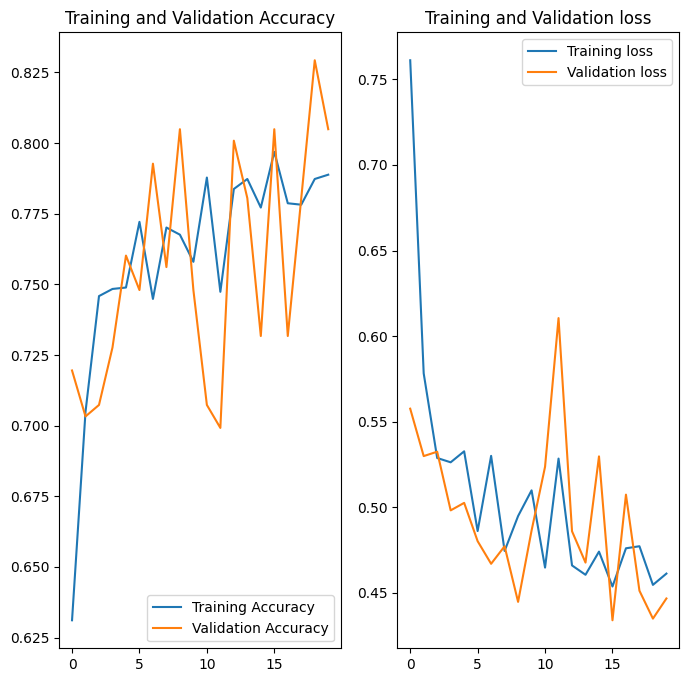

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(20),acc,label='Training Accuracy')
plt.plot(range(20),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(20),loss,label='Training loss')
plt.plot(range(20),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

In [ ]:
class_names=['Bacterial Spot','Healthy']

first image to predict
actual label: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
predicted label: Healthy


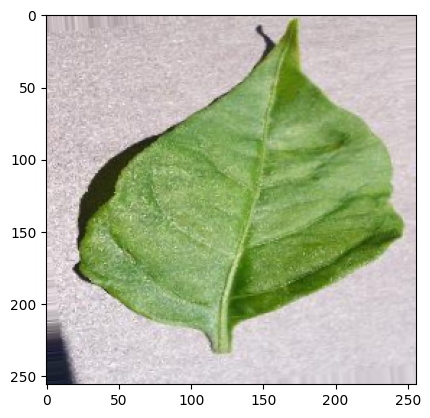

In [ ]:
import numpy as np
for images_batch,labels_batch in test_generator:
  first_image=images_batch[0]
  first_label=int(labels_batch[0])

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:",class_names[first_label])

  batch_prediction=model.predict(images_batch)

  print("predicted label:",class_names[np.argmax(batch_prediction[0])])
  break

In [ ]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i])
  img_array=tf.expand_dims(img_array,0)

  predictions=model.predict(img_array)

  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


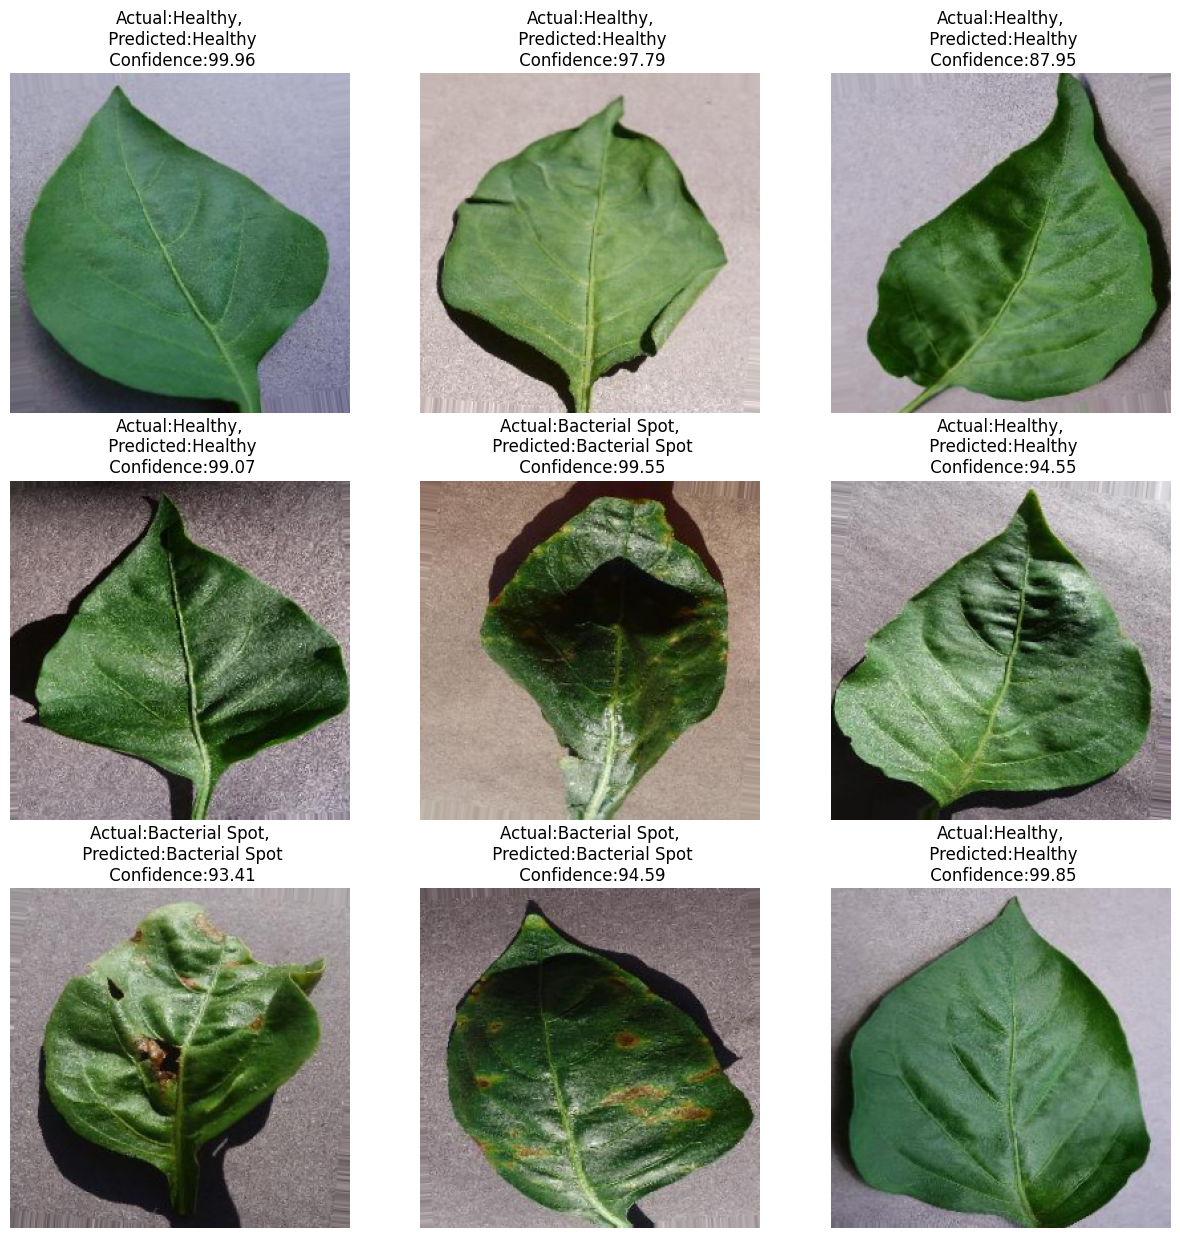

In [ ]:
plt.figure(figsize=(15,15))
for images,label in test_generator:
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i])

    predicted_class,confidence= predict(model,images[i])
    actual_class=class_names[int(label[i])]

    plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}\n Confidence:{confidence}"  )
    plt.axis("off")
  break


In [ ]:
model.save('/content/drive/MyDrive/pepper06-11.keras')